In [ ]:
!pip install lifelines
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 14.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d3c953d22afa9b1078f8a306e1846cdb924f3a4d8b9d089e0f735ddb2c35d257
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column sex have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'sex'].var())
>>> print(df.loc[~events, 'sex'].var())

A very low variance means that the column sex completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1165: ConvergenceWarning: Column age has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation

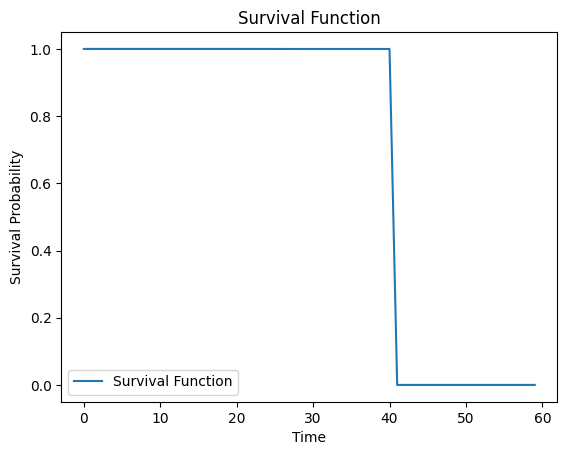

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import CoxPHFitter

# Create an example dataset
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'sex': [1, 0, 1, 0, 1],  # 1 represents male, 0 represents female
    'time': [10, 20, 30, 40, 50],  # Event occurrence time
    'event': [1, 0, 1, 0, 1]  # 1 represents event occurrence, 0 represents no event
})

# Create and fit the Cox regression model
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='event')

# Plot the survival function using the fitted model
time_points = np.arange(0, 60, 1)
covariates = pd.DataFrame({'age': 40, 'sex': 1}, index=[0])  # Use values close to your dataset
survival_function = np.exp(-cph.predict_cumulative_hazard(covariates, times=time_points).values)
plt.plot(time_points, survival_function, label='Survival Function')

# Customize the plot as needed
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.legend()
plt.show()





